<a href="https://colab.research.google.com/github/mastermind2000/My-Project/blob/master/CNN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN for Image Recognition

This demo gives a walkthrough of how to use a CNN using Keras, tested on the MNIST dataset.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

The [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) is a dataset of handwritten digits, famously used for image recognition (telling which digit is written in the image) and other purposes in the ML/DL paradigm. It is still used as a baseline measure in several Machine Learning tasks (see [Generative Adversarial Networks](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf); we'll look at this architecture near the end of the course). The images look something like this:

<img src="data/mnist_dataset.png" alt="The MNIST Dataset" width="400"/>

In [0]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 15s 1us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Shape of x_samp = (28, 28)


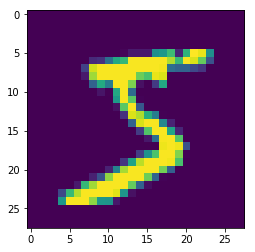

In [0]:
# Sample image
x_samp, y_samp = x_train[0], y_train[0]

print ("Shape of x_samp =", x_samp.shape)
plt.imshow(x_samp)
plt.show()

In [0]:
EPOCHS = 2
NUM_CLASSES = 10 # (0, 1, 2, ..., 9)

**Input Shapes**

The first Conv2D layer needs a parameter ```input_shape``` which tells it what shape of image to take as input. A lot of people have difficulty in understanding how to shape the input tensor and what to write in the ```input_shape``` parameter.

Images can be represented (formatted) in 2 ways:
1. Channels First: The shape of the input image is $(n_c, n_h, n_w)$. So in this case, it'll be ```(1, 28, 28)```.
2. Channels Last: The shape of the input image is $(n_h, n_w, n_c)$. So in this case it'll be ```(28, 28, 1)```.

There is no good consensus on which way of image formatting is better and convolutions work well in both cases. Let's assume we're using Channels Last in this case. 

**Note:** Whether to use channels first or channels last is probably fixed for your laptop. You might want to check out this link: [Correct way to change image channel ordering](https://stackoverflow.com/questions/43829711/what-is-the-correct-way-to-change-image-channel-ordering-between-channels-first?rq=1).

The ```input_shape``` parameter needs a 3-dimensional value. So even if your image is grayscale and has a 2D shape, as in this case (```(28, 28, 1)```), you need to give a 3D value. In this case it should be ```(28, 28, 1)```.

As for the input tensor, ```x_train```, it needs to be a 4D tensor, with a shape like this: $(m, n_c, n_h, n_w)$, where $m$ is the number of samples. If you image is grayscale and has a 2D shape, your input tensor will be 3D (like ```(60000, 28, 28)```) In this case you need to reshape the input from ```(60000, 28, 28)``` to ```(60000, 28, 28, 1)```.

Normalization helps with faster convergence.

Finally, since the number of classes is > 1 (multi-class classification), we need to one-hot encode the labels. Also, the number of neurons in the last layer will be equal to the number of classes and the activation of the last layer will be softmax.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# Normalization
x_train /= 255.
x_test /= 255.

# One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

**General Architecture**

The architecture of a CNN is simple. The first part comprises of a bunch of units, where each unit is a set of Convolutional layers followed by a Max Pooling layer. So that part may look like this:

```CONV -> CONV -> MAXPOOL -> CONV -> CONV -> MAXPOOL```

All through this part, the activations are 3D tensors. The next part involves unrolling the 3D tensor to a 1D tensor using a ```Flatten``` layer and then using ```Dense``` layers to propagate, with the last layer ending with a certain number of neurons, which depends on if it is a regression or classification problem (see the demo on MLPs). This can be something like this:

```FLATTEN -> DENSE -> DENSE```

So the CNN might look like this:

```CONV -> CONV -> MAXPOOL -> CONV -> CONV -> MAXPOOL -> FLATTEN -> DENSE -> DENSE```

For Conv layers, filter sizes of ```(3, 3)``` or ```(5, 5)``` and stride size of ```1``` usually work well. For Max Pooling layers, pool size of ```(2, 2)``` and strides of ```2``` typically works.

### Sequential Model

In [0]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=40)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 55s 915us/step - loss: 0.1435 - acc: 0.9568 - val_loss: 0.0529 - val_acc: 0.9823
Epoch 2/2
60000/60000 [==============================] - 52s 864us/step - loss: 0.0512 - acc: 0.9844 - val_loss: 0.0351 - val_acc: 0.9883


**Summary**

Let's look at the summary of the model.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


### Functional Model

In [0]:
from keras.models import Model
from keras.layers import Conv2D, Flatten, Dense, Dropout, Input, MaxPooling2D

In [0]:
input_1 = Input(shape = (28,28,1))
c1 = Conv2D(32,(5,5),strides = 1 ,padding="valid", activation = "relu")(input_1)
m1 = MaxPooling2D(pool_size=(2,2),strides = 2)(c1)
dr = Dropout(0.2)(m1)
fl = Flatten()(dr)
d1 = Dense(128,activation="relu")(fl)
out = Dense(10,activation="sigmoid")(d1)
model = Model(inputs = input_1, outputs = out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=40)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 56s 934us/step - loss: 0.1780 - acc: 0.9478 - val_loss: 0.0990 - val_acc: 0.9669
Epoch 2/2
60000/60000 [==============================] - 49s 812us/step - loss: 0.0628 - acc: 0.9810 - val_loss: 0.0512 - val_acc: 0.9824


**References**

Some better ConvNet architectures
1. [ResNets](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035)
2. [Inception Nets](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202)